In [193]:
import pandas as pd

# Leitura do CSV
csv = pd.read_csv('./results.csv', sep=',')
csv.head()

,title,subtitle,author,date,section,text,url
0,“A sociedade foi Rubens Paiva não os facínora...,A decisão da juíza que proíbe as Forças Armada...,F. M.,30/03/2019 00:11:08,Brasil,A juíza federal Ivani Silva da Luz de Brasíli...,https://brasil.elpais.com/brasil/2019/03/26/po...
1,Justiça suspende decisão que proibia Forças Ar...,Liminar havia sido concedida na sexta-feira a ...,Marina Rossi,30/03/2019 16:17:59,Brasil,Menos de 24 horas depois de a juíza federal Iv...,https://brasil.elpais.com/brasil/2019/03/30/po...
2,Governo Bolsonaro prega “negacionismo históric...,Marcos Napolitano professor da USP diz que o...,Regiane Oliveira,04/04/2019 22:37:48,Brasil,Quando determinou que de 31 de março 1964 u...,https://brasil.elpais.com/brasil/2019/04/05/po...
3,Quando os pais de Gabo perceberam que tinham u...,Gustavo Tatis percorre o universo de García Má...,Jesús Ruiz Mantilla,07/03/2019 16:38:56,Cultura,Quando era pequeno Luisa e Gabriel se preo...,https://brasil.elpais.com/brasil/2019/03/06/cu...
4,Rádios canadenses banem músicas de Michael Jac...,Quebec Cogeco Media toma a decisão após queixa...,Jaime Porras Ferreyra,07/03/2019 16:12:37,Cultura,Desde a manhã da última segunda-feira e ...,https://brasil.elpais.com/brasil/2019/03/06/cu...


In [194]:
#Questão 1
wordsList = ' '.join(csv.text.values).split(' ')
wordsList = list(filter(None, wordsList))
words = pd.DataFrame(wordsList, columns=['word'])

# Obtendo as frequencias
wordsCount = words.word.value_counts().reset_index()
wordsCount.columns = ['word', 'freq']
wordsCount['r'] = wordsCount.freq.rank(ascending=False)
wordsCount.head(n = 10)

totalOcurrences = wordsCount.freq.sum()
vocabularySize = wordsCount.word.count()
frequency = wordsCount['freq']

table1 = pd.DataFrame(csv.count(), columns=['Total Documents'], index = ['text'])
table1['Total Word Occurrences'] = totalOcurrences
table1['Vocabulary size'] = vocabularySize
table1['Words occurring > 1000 times'] = (frequency > 1000).sum()
table1['Words occurring once'] = (frequency == 1).sum()
table1.head()


,Total Documents,Total Word Occurrences,Vocabulary size,Words occurring > 1000 times,Words occurring once
text,249,213855,33847,23,20860


In [207]:
#Questão 2
table2 = wordsCount
table2['Pr(%)'] = (frequency/totalOcurrences) * 100
table2['r.Pr'] = (table2['Pr(%)'] / 100) * table2['r']
table2.head(n = 50)

,word,freq,r,Pr(%),r.Pr
0,de,10115,1.0,4.729840,0.047298
1,que,6493,2.0,3.036169,0.060723
2,a,6476,3.0,3.028220,0.090847
3,o,5450,4.0,2.548456,0.101938
4,e,5372,5.0,2.511982,0.125599
5,do,3434,6.0,1.605761,0.096346
6,em,3066,7.0,1.433682,0.100358
7,da,2997,8.0,1.401417,0.112113
8,um,2548,9.0,1.191462,0.107232
9,para,2212,10.0,1.034346,0.103435


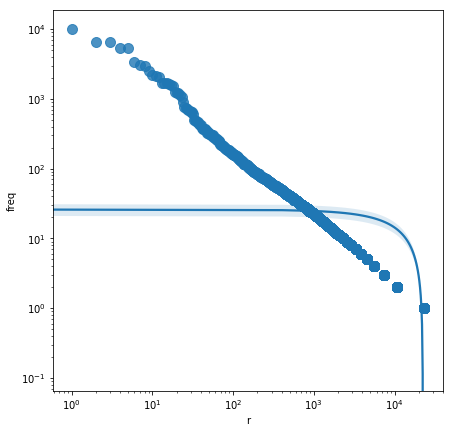

In [199]:
# Questão 3

%matplotlib inline
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "freq", wordsCount, ax=ax, scatter_kws={"s": 100})

## Bigramas
## TODO

In [209]:
# Questão 4

def getQtdWorsByFrequency(qtd_ocorrencias):
    return ((frequency == qtd_ocorrencias).sum())

table4 = pd.DataFrame(columns=['Number of occurrences', 'Predicted proportion', 'Actual proportion', 'Actual number of words'])
table4['Number of occurrences'] = range(1,11)
table4['Predicted proportion'] = 1/(table4['Number of occurrences'] * (table4['Number of occurrences'] + 1))
actualProportion = [round(float(getQtdWorsByFrequency(ocurr))/totalOcurrences, 4) for ocurr in range(1,11)]
table4['Actual proportion'] = actualProportion
table4['Actual number of words'] = [getQtdWorsByFrequency(ocurr) for ocurr in range(1,11)]

table4.head(10)
table4.style.hide_index()

Number of occurrences,Predicted proportion,Actual proportion,Actual number of words
1,0.5,0.0975,20860
2,0.166667,0.0216,4618
3,0.0833333,0.01,2142
4,0.05,0.0059,1266
5,0.0333333,0.0041,869
6,0.0238095,0.0027,572
7,0.0178571,0.0021,452
8,0.0138889,0.0017,373
9,0.0111111,0.0013,282
10,0.00909091,0.0012,254
